# Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

# Dataset

In [ ]:
irisData = datasets.load_iris()

X = irisData.data
y = irisData.target

## Divisón del dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Cross-Validation
kf = KFold(n_splits=5, random_state=7, shuffle=True)

# Modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluación

In [ ]:
score = knn.score(X_train,y_train)
print("Metrica del modelo", score)
 
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring="accuracy")
# Accuracy
print("Metricas de Accuracy cross_validation", scores)
print("Media de Accuracy cross_validation", scores.mean())

preds = knn.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds)

print()
print("Metrica en Test", score_pred)

report = classification_report(y_test, preds)
print(report)

Metrica del modelo 0.9666666666666667
Metricas de Accuracy cross_validation [0.95833333 0.95833333 0.95833333 0.91666667 1.        ]
Media de Accuracy cross_validation 0.9583333333333333

Metrica en Test 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_test, y_pred)*100)

Accuracy 100.0


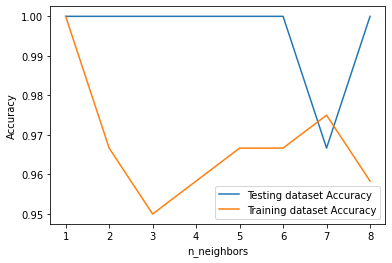

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

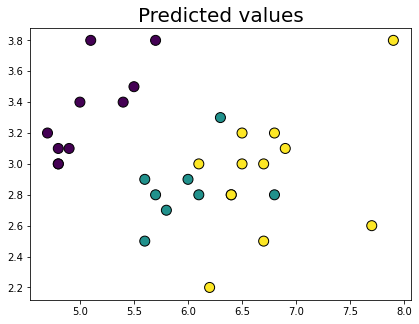

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=100,edgecolors='black')
plt.title("Predicted values", fontsize=20)
plt.show()